<a href="https://colab.research.google.com/github/faelbcosta/treinamento/blob/main/Estudo_NLP_Telegram_Comunidade_Flai_12_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise grupo Telegram: Comunidade Flai

**Objetivo**: 

Utilizar técnicas de NLP (nuvem de palarvas, extração de sentimentos, extração de tópicos etc), montando um código em Python comentado e explicado. 

**Origem deste estudo**:

Este estudo foi desenvolvido por Lucas Fávero, estudante do curso de extensão de Processamento de Linguagem Natural (PLN) do ICMC-USP, o qual parabenizo pela excelente iniciativa que oportuniza a possibilidade de outros estudantes na área terem acesso mais fácil a tais ferramentas. 

**Adaptação/Co-autoria:**

Através desse excelente estudo, Rafael Batista e Marcos Kunyosi (alunos da Flai), realizaram as devidas adaptações para o telegram da Comunidade Flai, identificando as variáveis e classificando as mensagens no ranking TOP 10 e a nuvem de palavras (wordcloud) mais discutidas no grupo.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

# Configurando a biblioteca pandas para mostrar todos os dados dentro do nosso Dataframe
pd.set_option("display.max_rows", 9999)
pd.set_option("display.max_columns", 99)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Através do Telegram Desktop, realizar a exportação do histórico das conversas em .json, depois incluir o arquivo aqui no Colab ou no google drive, realizando a importação abaixo.

In [2]:
# Abrindo o arquivo result.json que contem todas as mensagem extraidas do grupo
f = open("result.json", encoding="utf8")

# Carregando as mensagens do result.json
data = json.load(f)

# Carregando os campos importantes para construção do nosso Dataframe
msgs = data["messages"]

# Printando a estrutura de dados que contem informações sobre as mensagens do grupo
msgs

[{'action': 'migrate_from_group',
  'actor': 'Comunidade FLAI',
  'actor_id': 'channel1424499902',
  'date': '2021-04-30T08:36:23',
  'id': 1,
  'text': '',
  'title': 'Comunidade FLAI',
  'type': 'service'},
 {'date': '2021-04-30T08:45:01',
  'from': 'Vitor Diego',
  'from_id': 'user621311552',
  'id': 2,
  'text': [{'text': '@GroupHelpBot', 'type': 'mention'}],
  'type': 'message'},
 {'action': 'invite_members',
  'actor': 'Vitor Diego',
  'actor_id': 'user621311552',
  'date': '2021-04-30T08:46:06',
  'id': 3,
  'members': ['Group Help'],
  'text': '',
  'type': 'service'},
 {'date': '2021-04-30T08:46:07',
  'from': 'Group Help',
  'from_id': 'user162726413',
  'id': 4,
  'text': [{'text': 'Obrigado', 'type': 'bold'},
   ' por me adicionar como um Administrador no seu grupo!\n',
   {'text': 'Mande um start no meu privado', 'type': 'bold'},
   ', para que eu mande mensagens de erro sem poluir o chat.'],
  'type': 'message'},
 {'date': '2021-04-30T08:46:07',
  'edited': '2021-04-30T08

Aqui vamos construir o Dataframe contendo toda a informação extraída do grupo. Nesse momento, nossos campos mais importantes são: "from" que representa de quem é a mensagem, e "text" que é a própria mensagem. 

In [3]:
# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Printando o Dataframe
df

,id,type,date,actor,actor_id,action,title,text,from,from_id,members,edited,photo,width,height,reply_to_message_id,message_id,inviter,forwarded_from,poll,file,thumbnail,media_type,sticker_emoji,mime_type,duration_seconds,saved_from,via_bot
0,1,service,2021-04-30T08:36:23,Comunidade FLAI,channel1424499902,migrate_from_group,Comunidade FLAI,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,message,2021-04-30T08:45:01,NaN,NaN,NaN,NaN,"[{'type': 'mention', 'text': '@GroupHelpBot'}]",Vitor Diego,user621311552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,service,2021-04-30T08:46:06,Vitor Diego,user621311552,invite_members,NaN,,NaN,NaN,[Group Help],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,message,2021-04-30T08:46:07,NaN,NaN,NaN,NaN,"[{'type': 'bold', 'text': 'Obrigado'}, por me...",Group Help,user162726413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,message,2021-04-30T08:46:07,NaN,NaN,NaN,NaN,"[{'type': 'bold', 'text': 'Quem gerencia as co...",Group Help,user162726413,NaN,2021-04-30T08:53:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17832,18225,message,2021-12-29T19:37:02,NaN,NaN,NaN,NaN,[⚠️⚠️LINK DA AULA ⚠️ ⚠️ \n\nAgenda Especial - ...,Canal Comunidade FLAI,channel1447558178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canal Comunidade FLAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canal Comunidade FLAI,NaN
17833,18226,message,2021-12-29T19:55:31,NaN,NaN,NaN,NaN,Kkkkkkkkkkkkkkkkkkkkkkkkk,Andre Rev-9,user2133380003,NaN,NaN,NaN,NaN,NaN,18189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17834,18227,message,2021-12-29T19:58:23,NaN,NaN,NaN,NaN,Kkkkkkkkkkkkkkkkkkkkkkkkk,Andre Rev-9,user2133380003,NaN,NaN,NaN,NaN,NaN,18191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17835,18228,message,2021-12-29T20:04:51,NaN,NaN,NaN,NaN,Não vou conseguir acompanhar ao vivo🥲 assim qu...,Nayara,user1045280693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o Pandas podemos acessar os atributos .shape e .columns, assim podemos verificar as dimensões e colunas do Dataframe.

In [4]:
# Estrutura do Dataframe
df.shape

(17837, 28)

In [5]:
def LimparMsg(df):
    # esse comando exclui os registros em que o campo 'text' possui valores em branco
    texto_branco = df.loc[(df['text'] == '')]
    print(f"Msgs sem texto excluídas: {texto_branco.shape}")
    df = df.drop(texto_branco.index)

    # limpeza de dados de usuários-robos da comunidade
    texto_branco = df.loc[(df['from'] == '🤖 Flávia da FLAI') | (df['from'] == 'Canal Comunidade FLAI') | (df['from'] == 'Comunidade FLAI') ]
    print(f"Msgs de robôs excluídas: {texto_branco.shape}")
    df = df.drop(texto_branco.index)

    return df;

In [6]:
df = LimparMsg(df)

Msgs sem texto excluídas: (1207, 28)
Msgs de robôs excluídas: (788, 28)


In [7]:
# esse comando permite localizar e informar a quantidade de registros de um determinado usuário
df.loc[(df['from'] == 'Rafael Batista')].count()

id                     1831
type                   1831
date                   1831
actor                     0
actor_id                  0
action                    0
title                     0
text                   1831
from                   1831
from_id                1831
members                   0
edited                    1
photo                     1
width                     2
height                    2
reply_to_message_id     440
message_id                0
inviter                   0
forwarded_from            2
poll                      0
file                      1
thumbnail                 1
media_type                1
sticker_emoji             0
mime_type                 1
duration_seconds          1
saved_from                0
via_bot                   0
dtype: int64

In [8]:
# Nome de todas as colunas do Dataframe
df.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'text',
       'from', 'from_id', 'members', 'edited', 'photo', 'width', 'height',
       'reply_to_message_id', 'message_id', 'inviter', 'forwarded_from',
       'poll', 'file', 'thumbnail', 'media_type', 'sticker_emoji', 'mime_type',
       'duration_seconds', 'saved_from', 'via_bot'],
      dtype='object')

O próximo passo é agrupar as mensagens por autor e plotar os primeiros autores com mais mensagens dentro do grupo. Para isso utilizamos os métodos groupby() e plot() do Pandas. 

In [9]:
# Criando um novo Dataframe que vai receber o agrupamento a partir da coluna "from" que representa os autores das mensagens
# Também usamos o método count()
# a contagem aqui é para quantidade de msg enviadas (coluna 'from')
# uma outra abordagem seria fazer a contagem de palavras em cada msg, ou contagem de letras, (coluna 'text')
df_top10_text = df[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text

,from,text
0,Rafael Batista,1831
1,Stephanie Flai,1366
2,Juliana FLAI,871
3,Ricardo,837
4,Victor Sponchiado,635
5,Andre,509
6,Jonas,506
7,Edson,442
8,Victor Araújo,432
9,Luiz Claudio,359


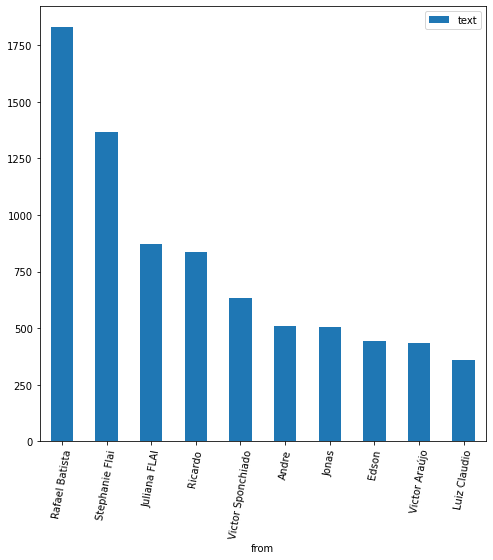

In [10]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do novo Dataframe que foi criado anteriormente
df_top10_text.plot.bar(x= "from", y="text", rot=80, figsize=(8, 8));

## Análise por tamanho das mensagens

In [11]:
# nova coluna para conter o total de letras na coluna 'text' (tamanho da mensagem)
df['text-len'] = df['text'].map(lambda x: len(x))

# análise de frequência: abordagem tamanho da mensagem enviada
df_top10_text_len = df[['text-len','from']].groupby(['from']).sum(['text-len']).sort_values(['text-len'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text_len.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text_len

,from,text-len
0,Rafael Batista,75079
1,Stephanie Flai,64242
2,Juliana FLAI,50682
3,Ricardo,38881
4,Victor Araújo,27590
5,Andre,24890
6,Jonas,24870
7,Theresa Rocha,20782
8,Edson,19886
9,Victor Sponchiado,18892


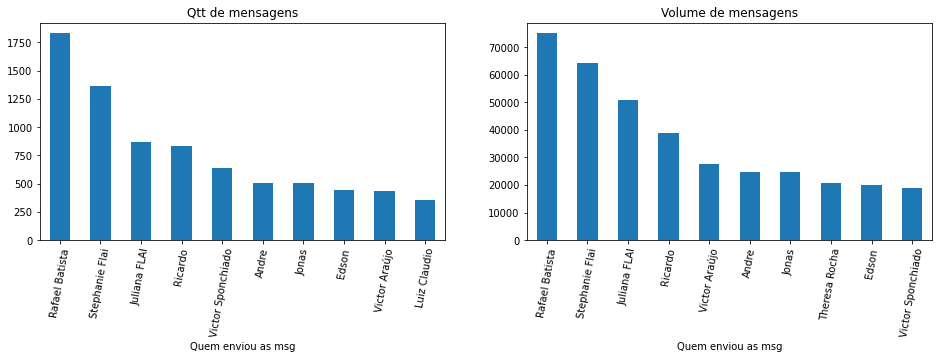

In [12]:
# Análise gráfica: usuários mais ativos

figure, axes = plt.subplots(1, 2)

df_top10_text.plot.bar(ax=axes[0], 
                       x= "from", y="text", 
                       rot=80, 
                       figsize=(16, 4), 
                       title="Qtt de mensagens",
                       xlabel='Quem enviou as msg',
                       legend=False);

df_top10_text_len.plot.bar(ax=axes[1], 
                           x= "from", y="text-len", 
                           rot=80, figsize=(16, 4), 
                           title='Volume de mensagens',
                           xlabel='Quem enviou as msg',
                           legend=False);


# Análise mensal Comunidade Flai

Neste tópico realizaremos a análise das informações do Grupo do Telegram pelos períodos mensais.

Para possibilitar um maior conhecimento do código e utilização do python, resolvemos manter os 02(dois) pontos de vistas dos co-autores para que o leitor possa compreender sob diferentes óticas o código.

## Código base: Rafael Batista

In [13]:
# Criando uma função para realizar a consulta das informações referentes a períodos mensais
def Consulta(i):
    base = df.loc[(df['date'] > ('2021-'+i+'-01T00:00:00'))&(df['date'] < ('2021-'+i+'-31T23:59:59'))]
    base_res = base[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False)
    base_res.reset_index(inplace=True)
    return base_res

In [14]:
#janeiro = Consulta('01')
#janeiro = janeiro.rename(columns={'text': 'jan'})
#fevereiro = Consulta('02')
#fevereiro = fevereiro.rename(columns={'text': 'fev'})
#marco = Consulta('03')
#marco = marco.rename(columns={'text': 'mar'})
abril = Consulta('04')
abril = abril.rename(columns={'text': 'abr'})
maio = Consulta('05')
maio = maio.rename(columns={'text': 'mai'})
junho = Consulta('06')
junho = junho.rename(columns={'text': 'jun'})
julho = Consulta('07')
julho = julho.rename(columns={'text': 'jul'})
agosto = Consulta('08')
agosto = agosto.rename(columns={'text': 'ago'})
setembro = Consulta('09')
setembro = setembro.rename(columns={'text': 'set'})
outubro = Consulta('10')
outubro = outubro.rename(columns={'text': 'out'})
novembro = Consulta('11')
novembro = novembro.rename(columns={'text': 'nov'})
dezembro = Consulta('12')
dezembro = dezembro.rename(columns={'text': 'dez'})

In [15]:
# Conferindo as informações de um período específico
agosto.head(10)

,from,ago
0,Rafael Batista,157
1,Daniel Tengnom,80
2,Victor Araújo,79
3,Juliana FLAI,75
4,Edson,73
5,Nayara,71
6,Victor Sponchiado,68
7,Luciane Alencar,58
8,Theresa Rocha,57
9,Caio Janguas,54


In [16]:
# realizando a junção dos dataframes mensais em um único
merge_01 = pd.merge(abril, maio, how = 'outer')
merge_02 = pd.merge(junho, julho, how = 'outer')
merge_03 = pd.merge(agosto, setembro, how = 'outer')
merge_04 = pd.merge(outubro, novembro, how = 'outer')
merge_05 = pd.merge(merge_01, merge_02, how = 'outer')
merge_06 = pd.merge(merge_05, merge_03, how = 'outer')
merge_07 = pd.merge(merge_06, merge_04, how = 'outer')
comunidade_flai = pd.merge(merge_07, dezembro, how = 'outer')

In [17]:
# conferindo o dataframe criado
comunidade_flai.head(10)

,from,abr,mai,jun,jul,ago,set,out,nov,dez
0,Filgueiras,30.0,231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vitor Time FLAI,22.0,11.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,Vitor Diego,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ricardo,14.0,107.0,111.0,182.0,37.0,115.0,77.0,154.0,40.0
4,Rafael Batista,12.0,130.0,171.0,435.0,157.0,342.0,48.0,357.0,179.0
5,Ana Bricio,11.0,75.0,24.0,2.0,NaN,NaN,2.0,NaN,NaN
6,Isabel Gontijo,11.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,L.,10.0,19.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN
8,Group Help,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Luiz Mestraaum,3.0,107.0,4.0,20.0,12.0,53.0,7.0,12.0,11.0


In [18]:
# realizando consultas através de filtros no pandas com a função "sort_values"
comunidade_flai.sort_values(by=['out'], ascending=False).head(10)

,from,abr,mai,jun,jul,ago,set,out,nov,dez
166,Stephanie Flai,NaN,NaN,NaN,NaN,15.0,443.0,474.0,302.0,132.0
168,Leon Emiliano Benenati,NaN,NaN,NaN,NaN,4.0,67.0,128.0,49.0,NaN
25,Jonas,NaN,56.0,71.0,150.0,26.0,91.0,81.0,28.0,3.0
3,Ricardo,14.0,107.0,111.0,182.0,37.0,115.0,77.0,154.0,40.0
26,Victor Sponchiado,NaN,49.0,46.0,126.0,68.0,111.0,73.0,105.0,57.0
185,Otávio Soares,NaN,NaN,NaN,NaN,NaN,47.0,67.0,26.0,24.0
22,Juliana FLAI,NaN,104.0,80.0,122.0,75.0,136.0,66.0,119.0,169.0
108,Edson,NaN,NaN,NaN,58.0,73.0,86.0,52.0,107.0,66.0
4,Rafael Batista,12.0,130.0,171.0,435.0,157.0,342.0,48.0,357.0,179.0
24,Andre,NaN,76.0,45.0,63.0,30.0,128.0,45.0,107.0,15.0


In [19]:
# realizando consulta e comparativo de dois períodos
comunidade_flai[['from','dez','ago']].sort_values(by=['dez'], ascending=False).head(10)

,from,dez,ago
4,Rafael Batista,179.0,157.0
22,Juliana FLAI,169.0,75.0
166,Stephanie Flai,132.0,15.0
45,Nayara,75.0,71.0
108,Edson,66.0,73.0
23,Victor Araújo,66.0,79.0
341,Leandro Dos Santos,59.0,NaN
26,Victor Sponchiado,57.0,68.0
111,Vanio,42.0,23.0
117,Ítalo Lopes,41.0,16.0


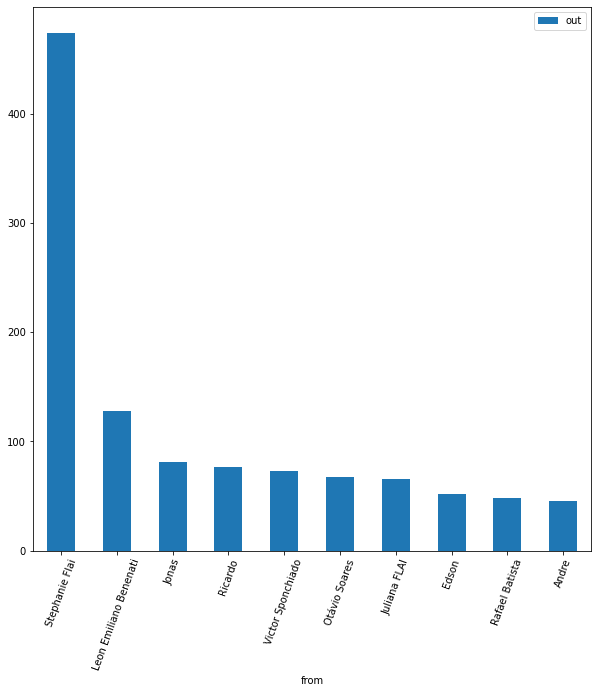

In [20]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do período desejado
# como a base mensal possui várias linhas, realizamos um recorte da base, considerando o ranking dos 10 primeiros para plotar no gráfico
periodo_graf = outubro.head(10)
periodo_graf.plot.bar(x= "from", y="out", rot=70, figsize=(10, 10));

## Código base: Marcos Kunyosi

In [21]:
#  recebe: um dataframe, ano e mes para consulta
#  devolve: um dataframe com os nomes (sem ordenação), quantide de msg enviadas e respectivos tamanho de msg 
def ConsultaDadosMes(dFrame, ano, mes,  sort='vol', topN=-1):
    txt_begin = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    mes += 1
    if mes > 12:
        ano += 1
        mes = 1
    txt_end = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    #debug
    #print(txt_begin)
    #print(txt_end)
    #print(topN)
    
    base = dFrame.loc[(df['date'] >= (txt_begin)) & (df['date'] < (txt_end))]
 
    base_res = base[['text','from']].groupby(['from']).count() 
    base_res['text-len'] = base[['text-len','from']].groupby(['from']).sum(['text-len'])
    
    base_res.reset_index(inplace=True)
    
    if sort == 'qtt':
        base_res = base_res.sort_values(['text'], ascending=False).head(topN)
        columns = ['from', 'text', 'text-len']
    elif sort == 'vol':
        base_res = base_res.sort_values(['text-len'], ascending=False).head(topN)
        columns = ['from', 'text-len', 'text']
    elif sort == 'none':        
        columns = ['from', 'text-len', 'text']
    else:
        raise Exception("Opção de ordenação inválida!")

    base_res['rank'] = range(1, base_res.shape[0]+1)
    columns.insert(0, 'rank')
    base_res = base_res[columns]


    return base_res

In [22]:
# Exemplo de chamada da nova função Consulta
# Revisado por Marcos Kunyosi
mes=11
top_N=10
cons = ConsultaDadosMes(df, 2021, mes, sort='qtt', topN = top_N)
print(f"\nTop-{top_N}: qtt de msg enviadas (mes={mes})")
#print(cons.sort_values(['text'], ascending=False));
print(cons.to_string(index=False))

cons = ConsultaDadosMes(df, 2021, mes, sort='vol', topN = top_N)
print(f"\nTop-{top_N}: volume de msg enviadas(mes={mes})")
#print(cons.sort_values(['text-len'], ascending=False));
print(cons.to_string(index=False))



Top-10: qtt de msg enviadas (mes=11)
 rank               from  text  text-len
    1     Rafael Batista   357     12082
    2     Stephanie Flai   302     13457
    3            Ricardo   154      5944
    4       Juliana FLAI   119      6465
    5              Edson   107      4583
    6              Andre   107      4030
    7  Victor Sponchiado   105      3217
    8     Marcos Kunyosi    63      6899
    9              Vanio    60      3509
   10            Carla .    51      4565

Top-10: volume de msg enviadas(mes=11)
 rank            from  text-len  text
    1  Stephanie Flai     13457   302
    2  Rafael Batista     12082   357
    3  Marcos Kunyosi      6899    63
    4    Juliana FLAI      6465   119
    5         Ricardo      5944   154
    6     Ítalo Lopes      4883    46
    7           Edson      4583   107
    8         Carla .      4565    51
    9           Andre      4030   107
   10           Vanio      3509    60


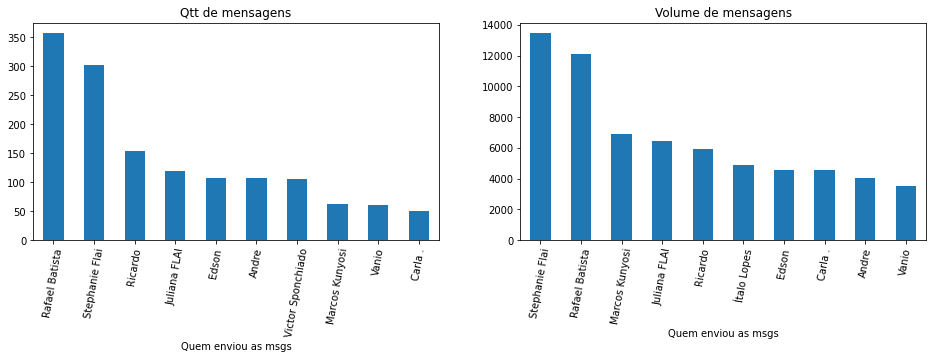

In [23]:
# Análise gráfica: usuários mais ativos


#periodo_graf = outubro.head(10)
#periodo_graf.plot.bar(x= "from", y="out", rot=70, figsize=(10, 10));

mes=11
top_N=10

figure, axes = plt.subplots(1, 2)

cons = ConsultaDadosMes(df, 2021, mes, sort='qtt', topN = top_N)
cons.plot.bar(ax=axes[0], 
                       x= "from", y="text", 
                       rot=80, 
                       figsize=(16, 4), 
                       title="Qtt de mensagens",
                       xlabel='Quem enviou as msgs',
                       legend=False);

cons = ConsultaDadosMes(df, 2021, mes, sort='vol', topN = top_N)
cons.plot.bar(ax=axes[1], 
                           x= "from", y="text-len", 
                           rot=80, figsize=(16, 4), 
                           title='Volume de mensagens',
                           xlabel='Quem enviou as msgs',
                           legend=False);


## Outras análises


In [24]:
# Exemplo de chamada da nova função Consulta
mes = 4
txt_replace_qtt = 'N-msg({:02d})'
txt_replace_vol = 'Vol-msg({:02d})'

#allConsultas = Consulta2(df, 2021, mes)
allConsultas = ConsultaDadosMes(df, 2021, mes, sort='none', topN = -1)
allConsultas = allConsultas.rename(columns={'text': txt_replace_qtt.format(mes), 'text-len': txt_replace_vol.format(mes)})
for mes in range(5, 13):
    #consult = Consulta2(df, 2021, mes)
    consult = ConsultaDadosMes(df, 2021, mes, sort='none', topN = -1)
    consult = consult.rename(columns={'text': txt_replace_qtt.format(mes), 'text-len': txt_replace_vol.format(mes)})
    allConsultas = allConsultas.merge(consult, on="from", how='outer')


In [25]:
allConsultas.head(5)

,rank_x,from,Vol-msg(04),N-msg(04),rank_y,Vol-msg(05),N-msg(05),rank_x,Vol-msg(06),N-msg(06),rank_y,Vol-msg(07),N-msg(07),rank_x,Vol-msg(08),N-msg(08),rank_y,Vol-msg(09),N-msg(09),rank_x,Vol-msg(10),N-msg(10),rank_y,Vol-msg(11),N-msg(11),rank,Vol-msg(12),N-msg(12)
0,1.0,Adriana,11.0,1.0,1.0,19.0,2.0,2.0,38.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Agner,340.0,2.0,3.0,127.0,3.0,3.0,168.0,4.0,2.0,95.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,99.0,2.0,NaN,NaN,NaN
2,3.0,Aline Pacheco,344.0,2.0,8.0,1702.0,30.0,8.0,282.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Ana Bricio,556.0,11.0,11.0,3727.0,75.0,9.0,760.0,24.0,10.0,50.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,67.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Daniel Fonseca,8.0,1.0,21.0,665.0,24.0,19.0,122.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Conferindo as informações de um período específico (apenas um mês) com ordenação pelo volume de mensagens
def dadosMes(mes_consulta, sort='vol'):
    #mes_consulta=10
    txt_replace_qtt = 'N-msg({:02d})'
    txt_replace_vol = 'Vol-msg({:02d})'
    if sort == 'vol':
        ret_dados = allConsultas[['from', 
                  txt_replace_qtt.format(mes_consulta), 
                  txt_replace_vol.format(mes_consulta)] 
                  ].sort_values([txt_replace_vol.format(mes_consulta)], ascending=False).head(10)
    elif sort == 'qtt':
        ret_dados = allConsultas[['from', 
                  txt_replace_qtt.format(mes_consulta), 
                  txt_replace_vol.format(mes_consulta)] 
                  ].sort_values([txt_replace_qtt.format(mes_consulta)], ascending=False).head(10)
    else:
        raise Exception("Opção de ordenação inválida!")

    return ret_dados;

In [27]:
# Conferindo as informações de todo o período ordenado pelo volume de um mês
mes_ordenacao=10
allConsultas.sort_values([txt_replace_vol.format(mes_ordenacao)], ascending=False).head(10)

,rank_x,from,Vol-msg(04),N-msg(04),rank_y,Vol-msg(05),N-msg(05),rank_x,Vol-msg(06),N-msg(06),rank_y,Vol-msg(07),N-msg(07),rank_x,Vol-msg(08),N-msg(08),rank_y,Vol-msg(09),N-msg(09),rank_x,Vol-msg(10),N-msg(10),rank_y,Vol-msg(11),N-msg(11),rank,Vol-msg(12),N-msg(12)
181,NaN,Stephanie Flai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,704.0,15.0,126.0,23331.0,443.0,76.0,22131.0,474.0,119.0,13457.0,302.0,86.0,4619.0,132.0
55,NaN,Jonas,NaN,NaN,43.0,2854.0,56.0,33.0,2645.0,71.0,49.0,5993.0,150.0,34.0,1608.0,26.0,70.0,5061.0,91.0,40.0,5246.0,81.0,58.0,1157.0,28.0,42.0,306.0,3.0
175,NaN,Leon Emiliano Benenati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,93.0,4.0,82.0,2363.0,67.0,45.0,4594.0,128.0,67.0,1577.0,49.0,NaN,NaN,NaN
14,15.0,Ricardo,502.0,14.0,71.0,6202.0,107.0,53.0,6525.0,111.0,88.0,8041.0,182.0,58.0,1425.0,37.0,117.0,3992.0,115.0,70.0,4273.0,77.0,111.0,5944.0,154.0,83.0,1977.0,40.0
57,NaN,Juliana FLAI,NaN,NaN,45.0,7373.0,104.0,35.0,4378.0,80.0,51.0,7763.0,122.0,36.0,4381.0,75.0,73.0,8505.0,136.0,42.0,3857.0,66.0,63.0,6465.0,119.0,45.0,7960.0,169.0
252,NaN,Otávio Soares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,2270.0,47.0,64.0,3200.0,67.0,101.0,958.0,26.0,76.0,598.0,24.0
85,NaN,Theresa Rocha,NaN,NaN,82.0,4136.0,48.0,59.0,4693.0,47.0,100.0,1036.0,17.0,64.0,5397.0,57.0,128.0,1928.0,23.0,77.0,2913.0,33.0,121.0,679.0,13.0,NaN,NaN,NaN
121,NaN,Edson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,3343.0,58.0,17.0,3782.0,73.0,37.0,3415.0,86.0,23.0,2744.0,52.0,35.0,4583.0,107.0,25.0,2019.0,66.0
224,NaN,Israel Borges,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,7157.0,44.0,37.0,2634.0,28.0,56.0,88.0,3.0,NaN,NaN,NaN
33,NaN,Carla .,NaN,NaN,17.0,3058.0,21.0,NaN,NaN,NaN,18.0,618.0,10.0,11.0,618.0,6.0,18.0,918.0,10.0,12.0,2628.0,27.0,20.0,4565.0,51.0,14.0,2532.0,40.0


In [28]:
# Novo formato: realizando consulta e comparativo de dois períodos 
allConsultas[['from', 
              'N-msg(12)', 
              'N-msg(08)'] ].sort_values(['N-msg(12)'], ascending=False).head(10)

,from,N-msg(12),N-msg(08)
11,Rafael Batista,179.0,157.0
57,Juliana FLAI,169.0,75.0
181,Stephanie Flai,132.0,15.0
71,Nayara,75.0,71.0
121,Edson,66.0,73.0
88,Victor Araújo,66.0,79.0
355,Leandro Dos Santos,59.0,NaN
89,Victor Sponchiado,57.0,68.0
160,Vanio,42.0,23.0
165,Ítalo Lopes,41.0,16.0


# Utilizando a biblioteca WordCloud para construir uma nuvem de palavras

O primeiro passo é coletar todas as mensagens e colocar em uma única variável. E a partir dessa única variavél contendo todas as palavras das mensagens, vamos utilizar a biblioteca WordCloud para imprimir as palavras com maior frequência. 

In [29]:
# Retomar dados do jason inicial...
# Formatar e limpar a coluna "text" para remover textos desnecessários para análise
remove_strings = ["[", "]", "{", "}", "'type':", "'mention',", "'link',", "'text':", "'user_id':"]

for msg in msgs:
    for string in remove_strings:
        msg["text"] = str(msg["text"]).replace(string, "")

# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Limpar msgs desnecessárias (robôs e msg vazias)
df = LimparMsg(df)



Msgs sem texto excluídas: (1207, 28)
Msgs de robôs excluídas: (788, 28)


In [30]:
# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél.
# Alterado o nome da variável para não criar confusao com 'texto'
def ObterTexto(dFrame):
    text_all = " ".join(t1 for t1 in dFrame.text)

    # Printando o total de palavras e as mensagens 
    #print (f"O texto contém {len(text_all)} palavras.")
    #print("\n\n")
    return text_all

In [31]:
# criando um pré-processamento para analisar as palavras com maior frequência
def pre_processamento(texto):
  
    # seleciona apenas letras e coloca todas em minúsculo 
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [32]:
# Realizando o pré-processamento e análise das palavras frequentes.
# Ajuste na chamada da função
text_all = ObterTexto(df)
texto = pre_processamento(text_all)

# tokenizando 
tokens = word_tokenize(texto)

# contagem de frequencia
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

20 palavras mais frequentes:
[('dados', 866), ('pra', 855), ('aula', 813), ('pessoal', 719), ('https', 717), ('vou', 680), ('boa', 663), ('bom', 650), ('aqui', 646), ('dia', 586), ('q', 554), ('mention_name', 552), ('fazer', 482), ('vai', 463), ('bem', 448), ('sim', 431), ('obrigado', 427), ('vc', 413), ('flai', 377), ('hoje', 361)]


In [33]:
# verificando as 50 palavras mais frequentes
fd.most_common(50)

[('dados', 866),
 ('pra', 855),
 ('aula', 813),
 ('pessoal', 719),
 ('https', 717),
 ('vou', 680),
 ('boa', 663),
 ('bom', 650),
 ('aqui', 646),
 ('dia', 586),
 ('q', 554),
 ('mention_name', 552),
 ('fazer', 482),
 ('vai', 463),
 ('bem', 448),
 ('sim', 431),
 ('obrigado', 427),
 ('vc', 413),
 ('flai', 377),
 ('hoje', 361),
 ('ainda', 357),
 ('ricardo', 353),
 ('parabéns', 352),
 ('agora', 350),
 ('ser', 347),
 ('pode', 346),
 ('juliana', 340),
 ('n', 335),
 ('alguém', 333),
 ('aí', 332),
 ('tá', 328),
 ('link', 322),
 ('discord', 318),
 ('sobre', 314),
 ('todos', 313),
 ('obrigada', 308),
 ('power', 308),
 ('acho', 296),
 ('ver', 290),
 ('ter', 287),
 ('gente', 286),
 ('bi', 285),
 ('python', 281),
 ('noite', 275),
 ('área', 265),
 ('lá', 261),
 ('aulas', 254),
 ('tudo', 253),
 ('competição', 248),
 ('tarde', 245)]

In [34]:
# Formatando e limpando a coluna "text" para remover textos desnecessários para análise
remove_strings = ['\\n\\n','https','bot_command','mention_name','rules','code','admin','nComo','kkkkkk'
                  'networing','comandos','n\\nfale','\\n\\nsinta','\\n\\nalguns','Oigada','Oigado','kkkkk',
                  'n\\nconvidamos','vc','lin','raning','meet','pq','nao','nLink','googlecom',
                  'hj','bold','eita','meet\\nlin','flaviaflaibot','windows','Meet','.', "''"]

text_all_clean = text_all
for string in remove_strings:
    text_all_clean = text_all_clean.replace(string, "")



In [35]:
# verificando as diferenças
print("\ntexto original:")
print(text_all[:1000])
print("\ntexto limpo:")
print(text_all_clean[:1000])



texto original:
   '@GroupHelpBot'  'bold',  'Obrigado', ' por me adicionar como um Administrador no seu grupo!\n',  'bold',  'Mande um start no meu privado', ', para que eu mande mensagens de erro sem poluir o chat.'  'bold',  'Quem gerencia as configurações?', '\n\nTodos os admin ou apenas quem tem permissão para alterar as informações do grupo?\n\n',  'bold',  'Status:', ' Todos os admins' Que tal essa foto na capa do grupo? show Tô vendo essas configurações aqui, mas vou deixar pra você ver tudo isso, blz? Aliás, era melhor não estarmos conversando aqui né? Kkk pode falar hehehe depois vou apagar historico Show  'bot_command',  '/settings@GroupHelpBot'  'italic',  'Te enviei as configurações no chat privado.', '' Esse negócio do Group Help falando, é pra eu fazer alguma coisa? não, só nos adm vemos  'bot_command',  '/me'  'text_link',  'Enviado em chat privado', 'href': 'http://t.me/GroupHelpBot'  'bot_command',  '/start@GroupHelpBot'  'bot_command',  '/start@GroupHelpBot' 'Olá ',

In [36]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text_all_clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


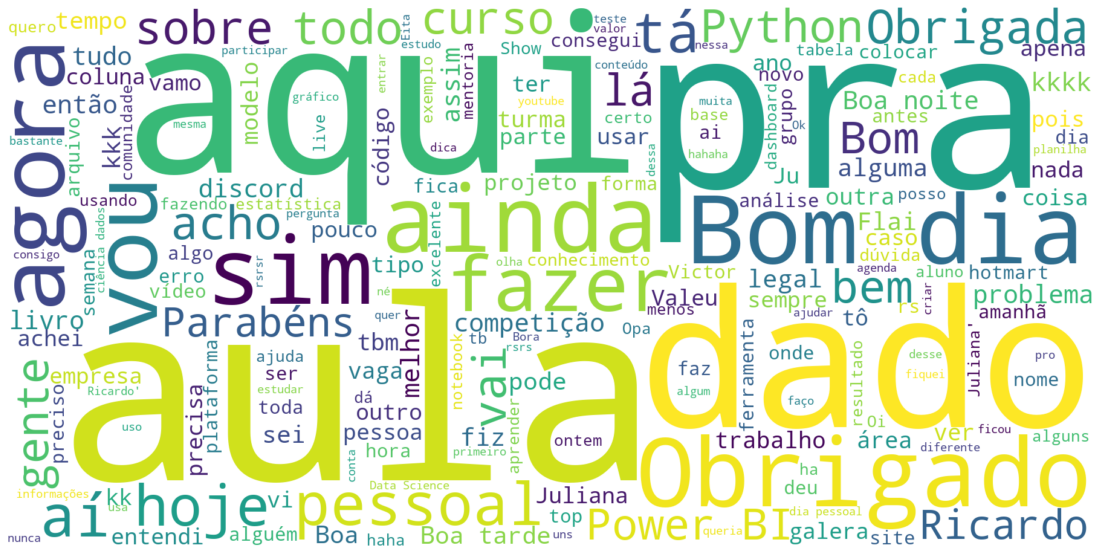

In [37]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ainda existem alguns termos que não nos explicam muita coisa e também podem ser removidos, o próximo passo vai ser limpar ainda mais esse modelo, adicionando esses termos na lista de stopwords.

A partir desse momento, a idéia é melhorar os stopwords, fazendo com que as palavras de melhor destaque apareçam na nuvem e trazer novas observações deste trabalho.

# Trabalhando com dados mensais no Wordcloud

In [38]:
# Criando uma função para realizar a consulta das informações referentes a períodos mensais
#def Consulta_cloud(mes):
def Consulta_cloud(dFrame, ano, mes):
    txt_begin = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    mes += 1
    if mes > 12:
        ano += 1
        mes = 1
    txt_end = '{:04d}-{:02d}-01T00:00:00'.format(ano, mes)
    base_cloud = dFrame.loc[(df['date'] >= (txt_begin)) & (df['date'] < (txt_end))]

    #base_cloud = df.loc[(df['date'] > ('2021-'+i+'-01T00:00:00'))&(df['date'] < ('2021-'+i+'-31T23:59:59'))]
    return base_cloud

In [39]:
# criando a base referente ao período desejado, necessitando somente digitar o indicativo referente ao mês
#cloud = Consulta_cloud(10)
ano = 2021
mes = 11
cloud = Consulta_cloud(df, ano, mes)


# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél para o período desejado
    #text = " ".join(text for text in cloud.text)
    #
    ## Printando o total de palavras e as mensagens 
    #print (f"O texto contém {len(text)} palavras.")
    #print("\n\n")
    #text

text = ObterTexto(cloud)

# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


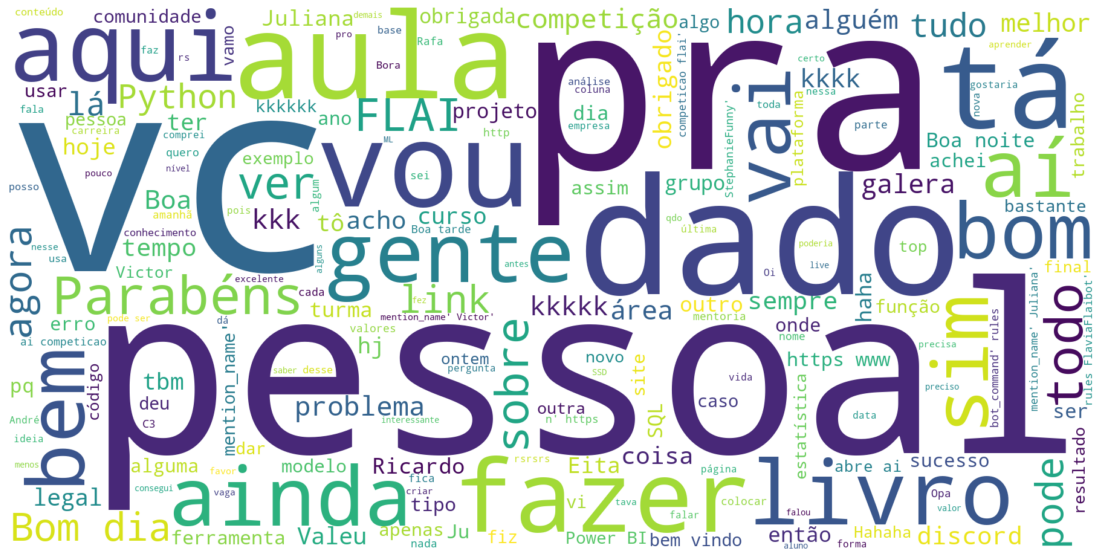

In [40]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Utilizando máscaras no Wordcloud

In [41]:
# importando as bibliotecas necessárias nesta etapa
import numpy as np
import PIL
from PIL import Image

In [42]:
# definindo uma imagem como máscara
mask1 = np.array(Image.open('/content/logo01.jpg'))
#mask2 = np.array(Image.open('/content/logo02.jpg'))
#mask3 = np.array(Image.open('/content/logo03.jpg'))

In [43]:
# verificando a máscara importada
mask1[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [44]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


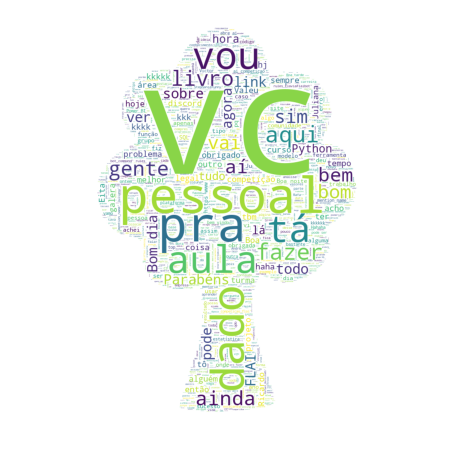

In [45]:
# define o tipo de imagem que deseja utilizar como máscara
imagem = mask1

# Criando o objeto wordcloud com as configs necessárias
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white', width=1600,
                      height=800, max_words=3000, mask=imagem, max_font_size=1000,
                      min_font_size=1).generate(text)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

# Referências

- Aula NLP - Victor Araújo - Comunidade Flai
- https://www.nltk.org/

- https://medium.com/turing-talks/uma-an%C3%A1lise-de-dom-casmurro-com-nltk-343d72dd47a7

- https://matplotlib.org/2.0.2/api/pyplot_api.html

- https://www.ti-enxame.com/pt/python/adicionarremover-palavras-de-parada-com-spacy/828959558/

- https://minerandodados.com.br/cafe-com-codigo-05-processamento-de-linguagem-natural-com-nltk/

- https://carlos-bonfim.medium.com/como-criar-uma-wordcloud-no-formato-que-quiser-4d013d7d85db